In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn import svm
from mpl_toolkits.mplot3d import Axes3D

In [2]:
X,y = make_circles(n_samples=500,noise=0.02,factor=0.8)

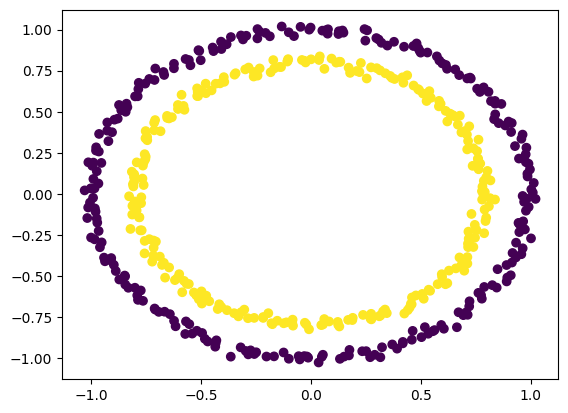

In [3]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [4]:
X.shape

(500, 2)

In [16]:
x1 = X[:,0]
x2 = X[:,1]
x3 = x1**2 + x2**2
X = np.column_stack((X,x3))

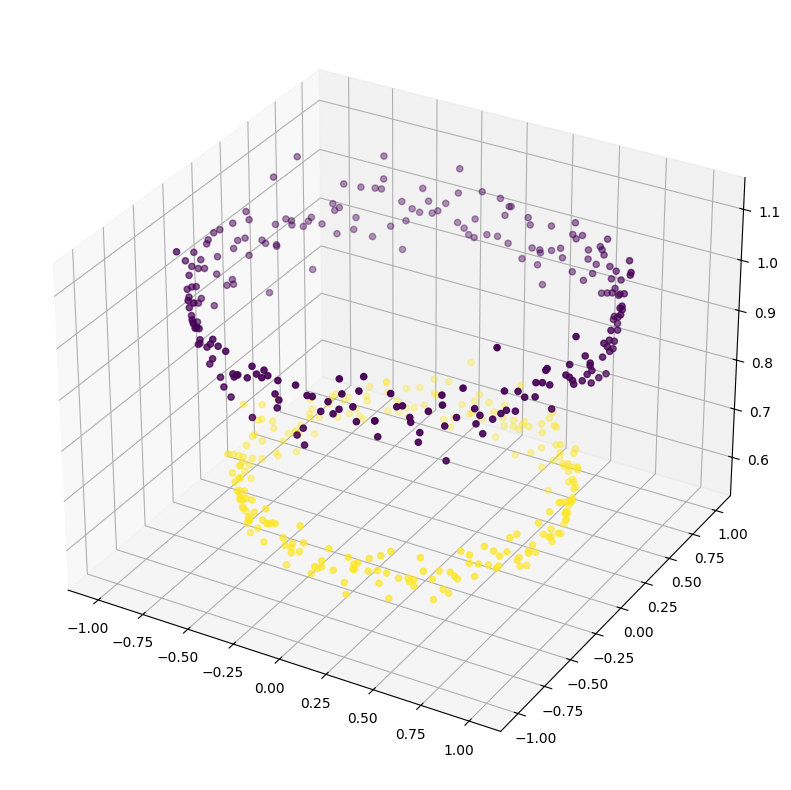

In [17]:
fig = plt.figure(figsize=((10,10)))
axes = fig.add_subplot(111,projection = '3d')
axes.scatter(X[:,0],X[:,1],X[:,2],c=y,depthshade=True)
plt.show()

In [19]:
clf = svm.SVC(kernel = 'linear')
clf.fit(X,y)

SVC(kernel='linear')

In [20]:
clf.score(X,y)

1.0

In [21]:
w = clf.coef_
b = clf.intercept_

In [22]:
w

array([[ 0.00993546, -0.04860318, -7.31216707]])

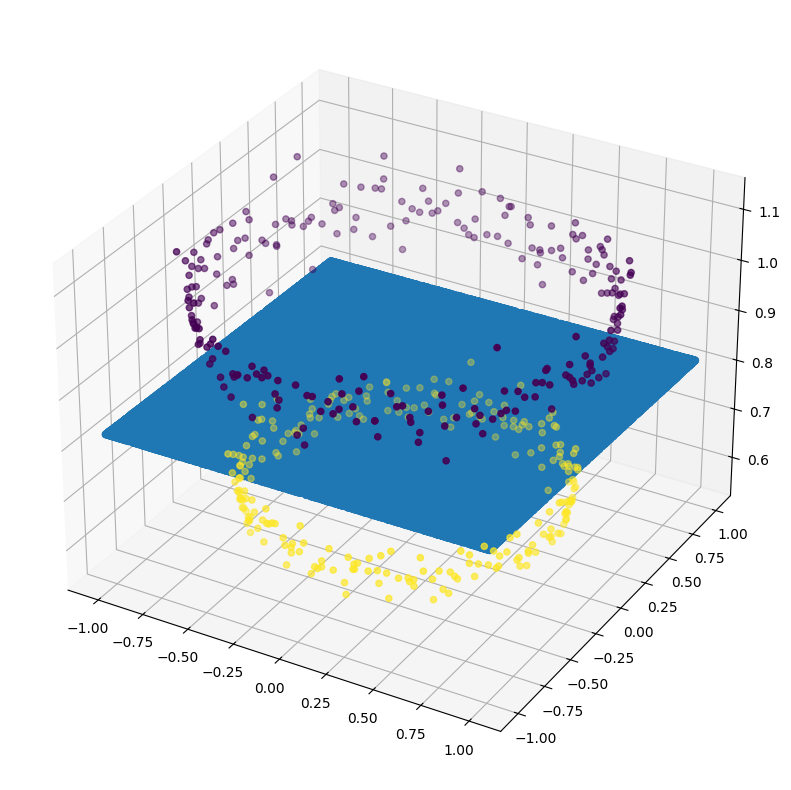

In [25]:
x1 = X[:,0]
x2 = X[:,1]

x1,x2 = np.meshgrid(x1,x2)
x3 = -(w[0][0]*x1 + w[0][1]*x2 + b)/w[0][2]

fig = plt.figure(figsize=(10,10))
axes = fig.add_subplot(111,projection = '3d')
axes.scatter(X[:,0],X[:,1],X[:,2],c=y,depthshade=True)

axes.scatter(x1,x2,x3,alpha=1)

plt.show()

In [5]:
# clf = svm.SVC(kernel = 'linear')
clf = svm.SVC(kernel = 'poly',degree=2)
# clf = svm.SVC(kernel = 'rbf')
clf.fit(X,y)
clf.score(X,y)

1.0

In [6]:
def custom_kernel(x,z):
    return np.square(np.dot(x,z.T))

In [7]:
clf = svm.SVC(kernel = custom_kernel)
clf.fit(X,y)
clf.score(X,y)

1.0